In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
class Perceptron:
    def __init__(self,eta:float=None,epochs :int =None):
        self.weights =np.random.randn(3)*1e-4 #small random weights
        training = (eta is not None) and (epochs is not None)
        if(training):
            print(f"initial weights before training : \n{self.weights}")
        self.eta  =eta;
        self.epochs =epochs;
   
    
    def _z_outcome(self,input,weights):
        return np.dot(input,weights)
    
    
    def activation_function(self,z):  #the output zero or one
        return np.where(z >0,1,0)
    
    
    def fit(self, X ,y):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X with bias : \n{X_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >>{epoch+1}")
            print("--"*10)

            
            z = self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass : \n{y_hat}")

            self.error = self.y - y_hat
            print(f"error :\n{self.error}")

            self.weights = self.weights +self.eta*np.dot(X_with_bias.T,self.error)
            print(f"updated weights after epoch : {epoch+1}/{self.epochs} : \n{self.weights}")
            print("##"*10)
    
    
    def predict(self,X):
        X_with_bias = np.c_[X,-np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)
    
    
    
    
    def total_loss(self):
        total_loss = np.sum(np.abs(self.error))
        print(f"\n total loss :{total_loss} \n")
        return total_loss
    
    
    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    
    def save(self,filename,model_dir =None):
        if model_dir is not None:
            model_file_path = self.create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self.create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
   
    
    def load(self):
        return joblib.load(filepath)

In [13]:
data = load_iris()
X = data.data
y = data.target
X = X[y != 2]
y = y[y != 2]
X = X[:, :2]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = Perceptron(eta=0.01, epochs=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
model.total_loss()


initial weights before training : 
[ 2.00257904e-04  1.08585570e-04 -1.25329154e-05]
X with bias : 
[[ 3.58663321e-01 -6.27704002e-01 -1.00000000e+00]
 [ 2.02041783e-01 -2.07835104e-01 -1.00000000e+00]
 [-7.37687441e-01  6.31902691e-01 -1.00000000e+00]
 [-1.67741667e+00  2.12033793e-01 -1.00000000e+00]
 [ 2.02041783e-01 -1.25750735e+00 -1.00000000e+00]
 [ 3.58663321e-01  2.73124718e+00 -1.00000000e+00]
 [-7.37687441e-01  8.41837140e-01 -1.00000000e+00]
 [ 3.58663321e-01 -4.17769553e-01 -1.00000000e+00]
 [-8.94308978e-01  2.09934449e-03 -1.00000000e+00]
 [ 1.29839254e+00 -1.25750735e+00 -1.00000000e+00]
 [-1.05093052e+00  6.31902691e-01 -1.00000000e+00]
 [-1.36417359e+00  2.12033793e-01 -1.00000000e+00]
 [ 8.28527933e-01  6.31902691e-01 -1.00000000e+00]
 [-4.24444366e-01  6.31902691e-01 -1.00000000e+00]
 [-7.37687441e-01 -1.67737625e+00 -1.00000000e+00]
 [-1.11201292e-01  1.68157493e+00 -1.00000000e+00]
 [ 2.02041783e-01 -2.07835104e-01 -1.00000000e+00]
 [ 1.92487869e+00  2.09934449e-03

np.int64(0)

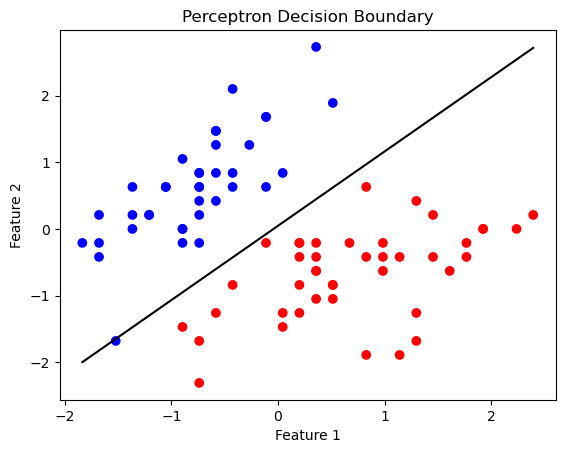

In [14]:
def plot_boundary(X, y, model):
    w = model.weights
    
    x_values = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_values = -(w[0]*x_values + w[2]) / w[1]
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
    plt.plot(x_values, y_values, color='black')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_boundary(X_train, y_train, model)